In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL

import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization

In [4]:
train_dir = 'F:\Assignment2_AI\dataset\DATASET\DATASET\TRAIN'
test_dir = 'F:\Assignment2_AI\dataset\DATASET\DATASET\TEST'

In [5]:
batch_size = 32
img_height = 64
img_width = 64

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 22564 files belonging to 2 classes.
Using 18052 files for training.


In [7]:

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2513 files belonging to 2 classes.
Using 502 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['O', 'R']


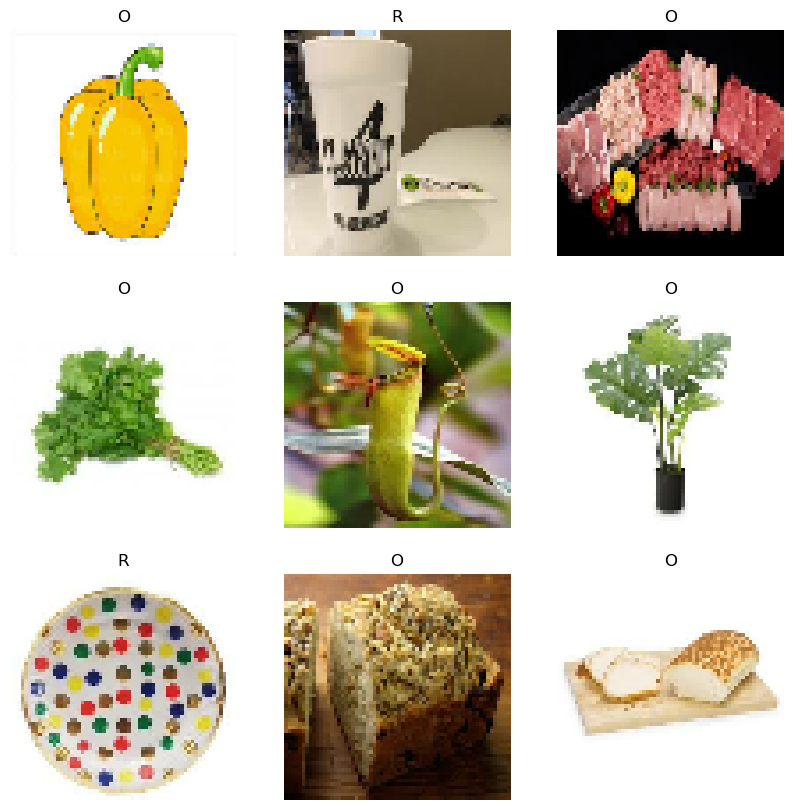

In [9]:
plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [13]:
from tensorflow.keras import layers

# Use the Rescaling layer without experimental
normalization_layer = layers.Rescaling(1./255)


In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
X_train, y_train = next(iter(normalized_ds))
first_image = X_train[0]
print(np.min(first_image), np.max(first_image))

0.0074697463 1.0


In [16]:
normalized_test = test_ds.map(lambda x, y: (normalization_layer(x), y))
X_test, y_test = next(iter(normalized_test))
first_img = X_test[0]
print(np.min(first_img), np.max(first_img))

0.0 1.0


In [22]:
model = Sequential([                
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)), 
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="relu"),
  tf.keras.layers.Dense(units=64, activation="relu"),
  tf.keras.layers.Dense(units=1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])
     

In [23]:
history = model.fit(
    X_train, y_train,
    epochs = 30,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4375 - loss: 0.6968 - val_accuracy: 0.3438 - val_loss: 0.8878
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.5625 - loss: 0.7333 - val_accuracy: 0.6875 - val_loss: 0.6867
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.8750 - loss: 0.6668 - val_accuracy: 0.6562 - val_loss: 0.6516
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.5625 - loss: 0.6650 - val_accuracy: 0.7188 - val_loss: 0.6638
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.8438 - loss: 0.6362 - val_accuracy: 0.3438 - val_loss: 0.7279
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.6250 - loss: 0.6222 - val_accuracy: 0.5625 - val_loss: 0.6903
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8125 - loss: 0.5805 - val_accuracy: 0.7500 - val_loss: 0.5967
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8125 - loss: 0.5460 - val_accuracy: 0.7188 - val_loss: 0.

In [24]:
loss, accuracy = model.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7188


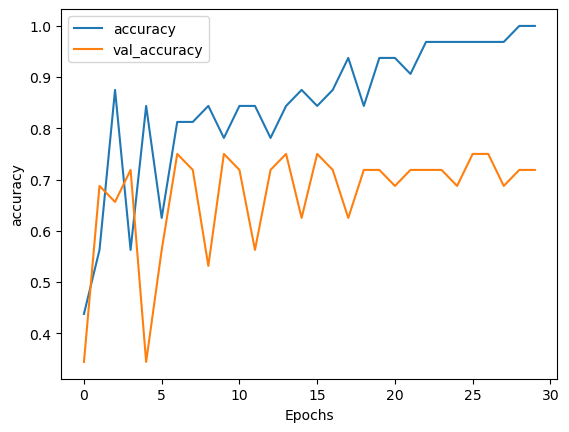

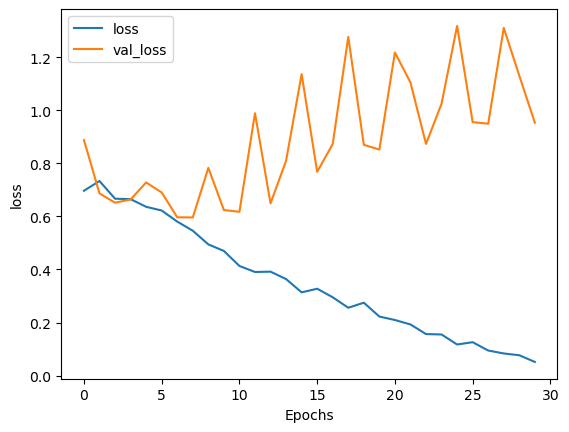

In [25]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [32]:
model2 = Sequential([
   tf.keras.layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(32, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,745 (920.88 KB)

 Trainable params: 235,745 (920.88 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history_2 = model2.fit(
    X_train, y_train,
    epochs = 30,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4375 - loss: 0.7079 - val_accuracy: 0.6562 - val_loss: 0.6663
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.4375 - loss: 0.7056 - val_accuracy: 0.3438 - val_loss: 0.7019
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.6250 - loss: 0.6910 - val_accuracy: 0.3438 - val_loss: 0.7196
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.5938 - loss: 0.6819 - val_accuracy: 0.3438 - val_loss: 0.7243
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.5938 - loss: 0.6872 - val_accuracy: 0.3438 - val_loss: 0.7069
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6250 - loss: 0.6784 - val_accuracy: 0.3438 - val_loss: 0.6985
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.6875 - loss: 0.6623 - val_accuracy: 0.4688 - val_loss: 0.6915
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.5625 - loss: 0.6757 - val_accuracy: 0.3750 - val_loss: 0.

In [34]:
loss, accuracy = model2.evaluate(X_train,y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8438
Testing Accuracy:  0.7188


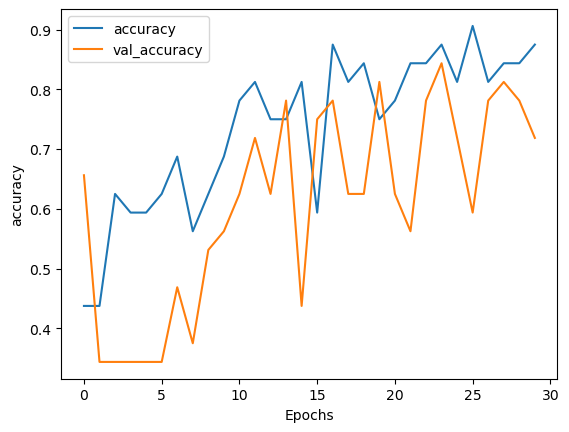

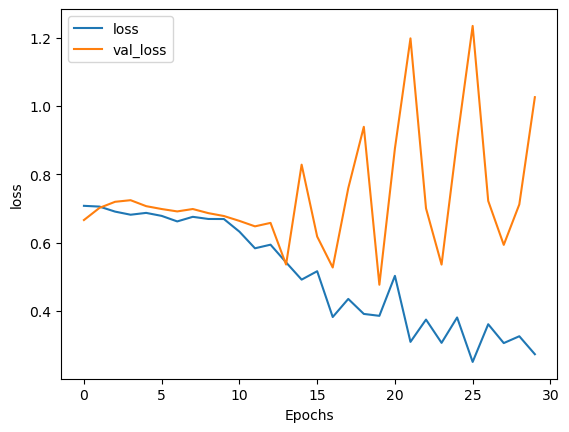

In [35]:
plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

In [36]:
model3 = Sequential([
   tf.keras.layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.MaxPool2D((2,2)),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(64, activation="relu"),
   tf.keras.layers.Dense(32, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")
])

model3.compile(optimizer='adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,769 (924.88 KB)

 Trainable params: 236,257 (922.88 KB)

 Non-trainable params: 512 (2.00 KB)

In [37]:
history_3 = model3.fit(
    X_train, y_train,
    epochs = 40,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5938 - loss: 0.9303 - val_accuracy: 0.6562 - val_loss: 0.6784
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.7812 - loss: 0.3911 - val_accuracy: 0.6875 - val_loss: 0.6853
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.9062 - loss: 0.1795 - val_accuracy: 0.6875 - val_loss: 0.6908
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 1.0000 - loss: 0.0921 - val_accuracy: 0.7500 - val_loss: 0.6904
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 1.0000 - loss: 0.0651 - val_accuracy: 0.6562 - val_loss: 0.6852
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 1.0000 - loss: 0.0308 - val_accuracy: 0.6562 - val_loss: 0.6809
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 1.0000 - loss: 0.0217 - val_accuracy: 0.6875 - val_loss: 0.6781
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.6875 - val_loss: 0.

In [38]:

loss, accuracy = model3.evaluate(X_test,y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
     

Testing Accuracy:  0.4375


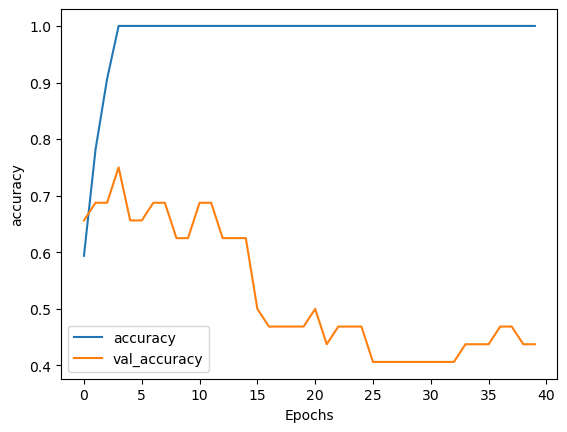

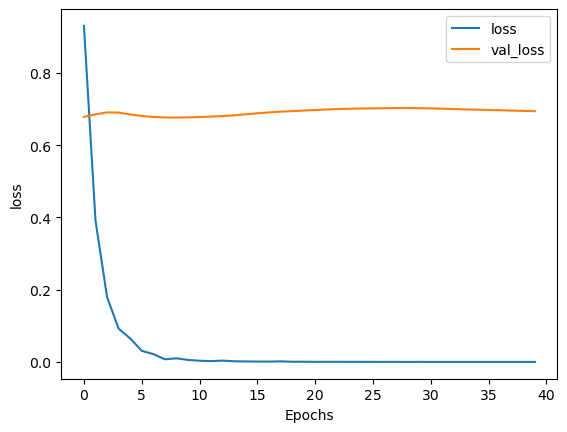

In [39]:
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")